
# ****Final Project Submission****


- Student name: Scott Johnson
- Student pace: Part Time
- Scheduled project review date/time: 2/19/2021
- Instructor name: Amanda Yandow
 
# Project Title: Modeling Census Data for COVID-19 Stimulus Checks

Build a classifier to predict whether a citizen should recieve a stimulus check based on having and income over/under 50K. Lessons learned from data set can be recylced to improve predictions after initial stimulus is delivered to those in neeed.
Outline:

1. Data cleaning and preprocessing
2. EDA
3. Split/Train DataSet
4. Feature Engineering
5. Modeling and Evaluatioin
6. Model evaluating
7. Choosing final model

## 1. Data Cleaning and Preprocessing

Import Packages and Data

In [13]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

#SCIKIT LEARN
#Scikit-learn is a machine learning toolkit that provides various tools to cater to different aspects of machine
#learning e.g. Classification, Regression, Clustering, Dimensionality reduction, Model selection, Preprocessing.
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

#train test split
from sklearn.model_selection import train_test_split

#k-fold cross validation
from sklearn.model_selection import cross_val_score

#PICKLE for saving objects
import pickle

# Pretty display for notebooks
%matplotlib inline

In [14]:
# Install a pip package in the current Jupyter kernel

import sys
!{sys.executable} -m pip install imblearn

from imblearn.over_sampling import SMOTE

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [9]:
#Load Dataset
income_df = pd.read_csv("income_evaluation.csv")

# print the shape
print('The shape of the dataset : ', income_df.shape)

#Take a look at first 10 rows
income_df.head(10)

The shape of the dataset :  (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [16]:
## Convert column names to python format with underscores instead of spaces or dashes

income_df.columns = income_df.columns.str.strip().str.replace('-', '_')
income_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [17]:
income_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
income_copy_df = income_df.copy()

### Check for missing data and placeholders.

In [63]:
print(income_copy_df.shape)
income_copy_df.isna().sum()

(32561, 15)


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [64]:
#check for place holders

for column in income_copy_df:
    #Select column contents by column name using [] operator
    columnSeriesdf = income_copy_df[column]
    print('Column : ', column)
    print('Contents : ', columnSeriesdf.unique())

Column :  age
Contents :  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Column :  workclass
Contents :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Column :  fnlwgt
Contents :  [ 77516  83311 215646 ...  34066  84661 257302]
Column :  education
Contents :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Column :  education_num
Contents :  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Column :  marital_status
Contents :  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Column :  occupation
Contents :  [' Adm-clerical

We can see, even though we don't have any null values, we do have ? placeholders. So let's separate our variables into to categorical and continous and then we'll get decide what to do with the ?'s.

In [65]:
categorical = [var for var in income_copy_df.columns if income_copy_df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [66]:
continuous = [var for var in income_copy_df.columns if income_copy_df[var].dtype!='O']

print('There are {} continuous variables\n'.format(len(continuous)))

print('The continuous variables are :\n\n', continuous)

There are 6 continuous variables

The continuous variables are :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Looks like we have 9 objects, 6 integer types. However, considering our future purpose, we have 6 continuous variables and 9 categorical variables. See below for what they represent:

#### Continuous Attributes

- age: continuous. **Age of an individual**
- education-num: number of education year, continuous. --> **Individual's year of receiving education**
- fnlwgt: final weight, continuous. --> **The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.**
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous. --> **Individual's working hour per week**


#### Categorical Attributes
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked --> **Individual work category**
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. --> **Individual's highest education degree**
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. --> **Individual marital status**
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. --> **Individual's occupation**
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. --> **Individual's relation in a family**
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. --> **Race of Individual**
- sex: Female, Male.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. --> **Individual's native country**

Let's now deal with the ?'s in our categorical variables. Let's first check their frequency percentage.

In [68]:
for var in categorical:
    
     print(income_copy_df[var].value_counts()/np.float(len(income_copy_df)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name:

We will replace the ? with NaN so Python can detect the nulls.

In [75]:
income_copy_df['workclass'].replace(' ?', np.NaN, inplace=True)
income_copy_df['marital_status'].replace(' ?', np.NaN, inplace=True)
income_copy_df['native_country'].replace(' ?', np.NaN, inplace=True)
income_copy_df['occupation'].replace(' ?', np.NaN, inplace=True)

In [76]:
for var in categorical:
    
     print(income_copy_df[var].value_counts()/np.float(len(income_copy_df)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital_status, dtype: float6

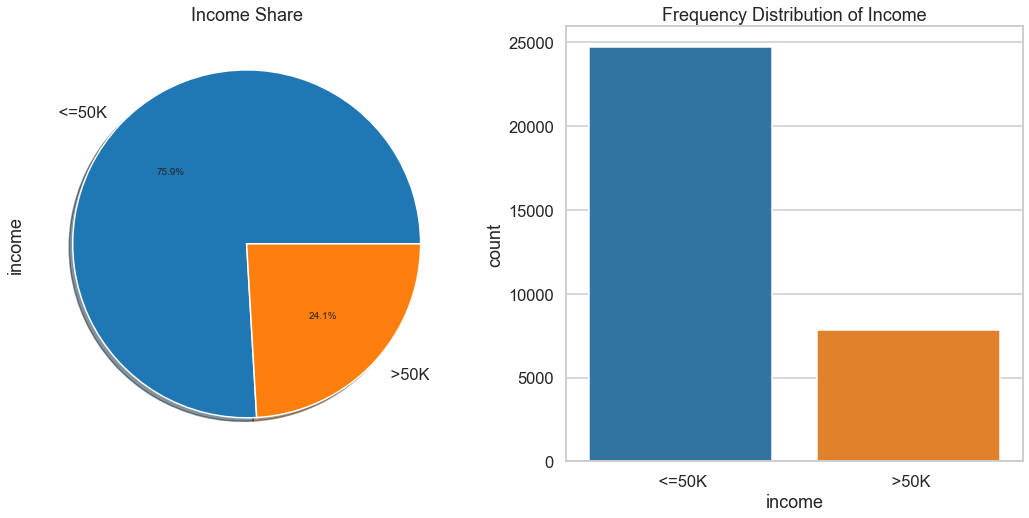

In [30]:
# visualize frequency distribution of income variable
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = income_df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=income_df)
ax[1].set_title("Frequency Distribution of Income")

plt.show()

We can see that 24.1% of the people in our data set make above 50k and 75% make equal to or below 50k.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4d5a0aba8>,
      dtype=object)

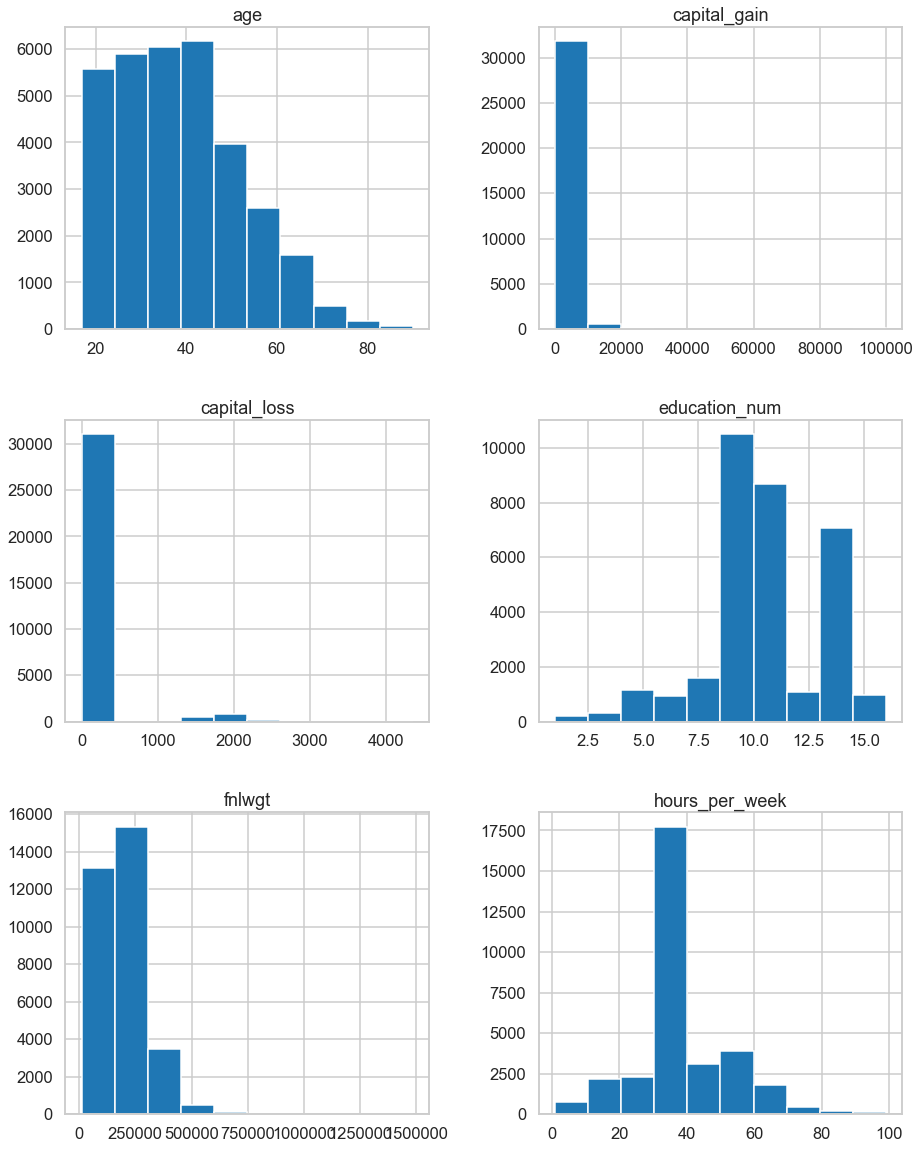

In [31]:
#plots for continuous variables
income_df.hist(figsize = (15, 20))

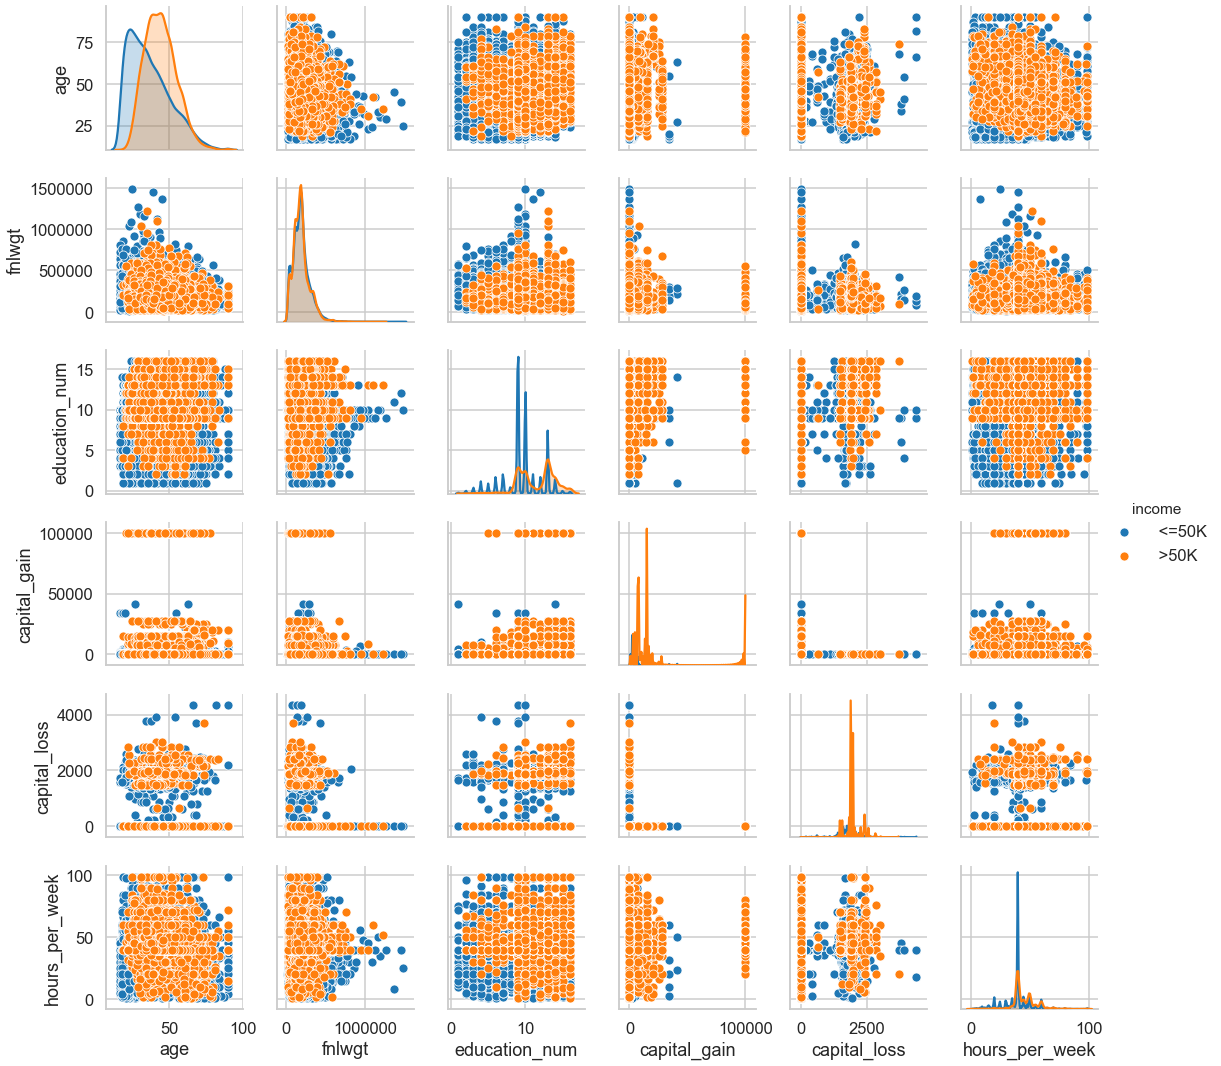

In [82]:
sns.pairplot(income_df, hue="income")

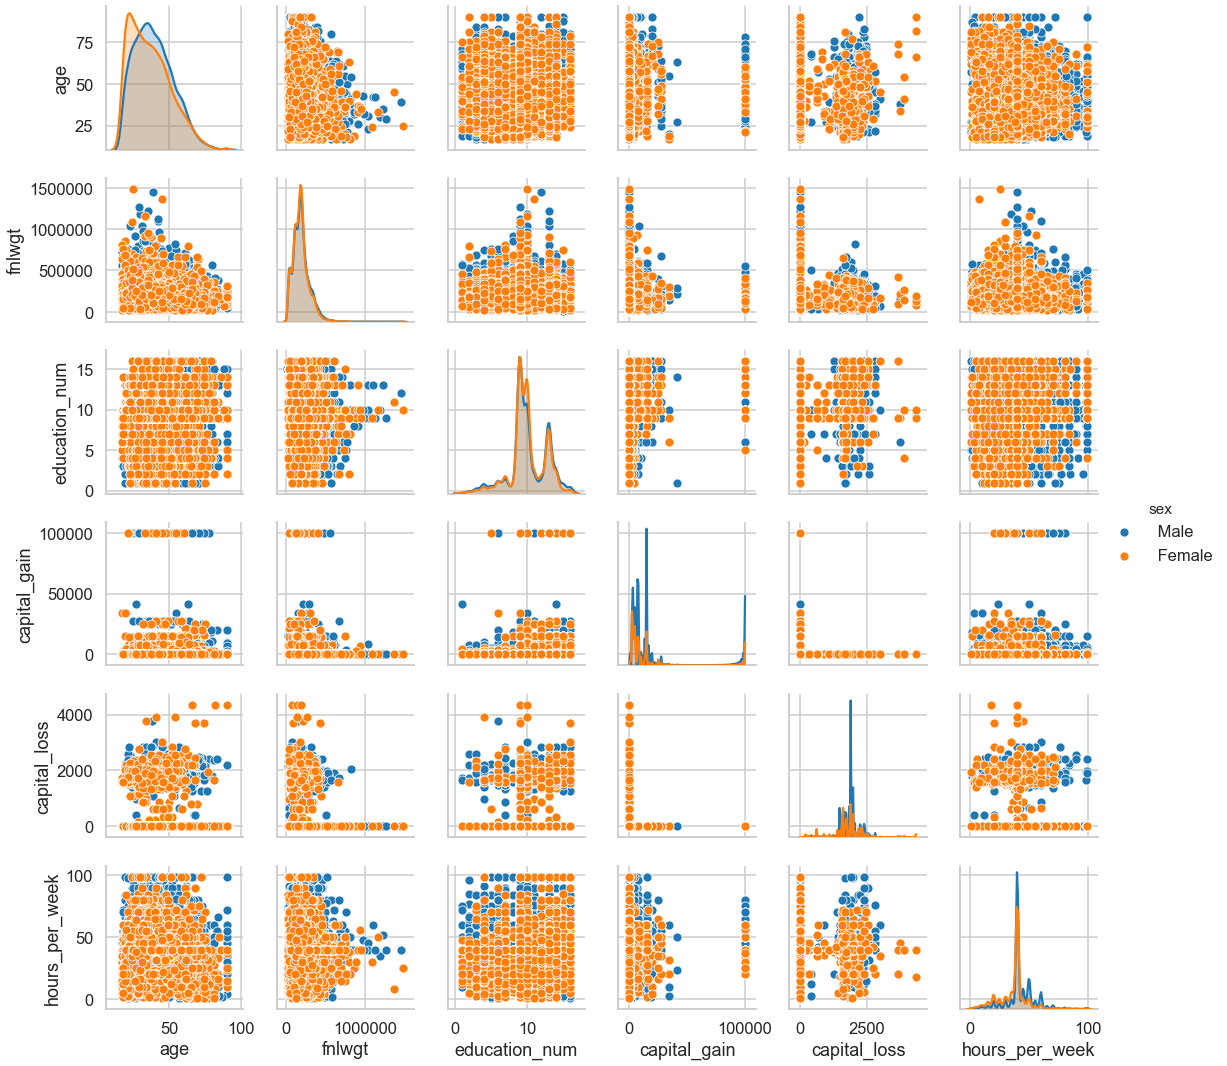

In [83]:
sns.pairplot(income_df, hue="sex")

### Correlation Matrix

Though not significantly high, the most notably correlated values are between the education number and the numbers of hours and captial gain. Are the hardest workers better educated?

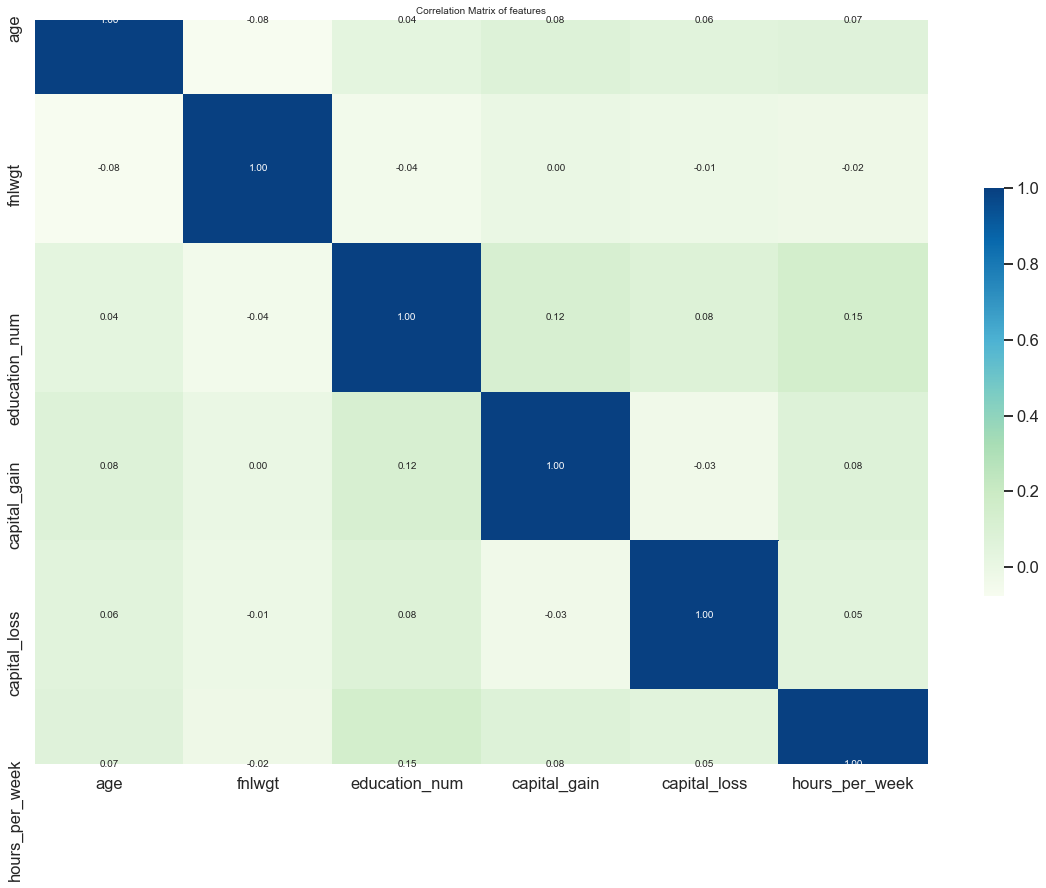

In [35]:
correlation_matrix = income_df.corr()
plt.figure(figsize=(20, 15))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=10)
plt.show()

In [36]:
## Let's find out if there are discrepancies between average ages.
income_df.groupby(['income'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


Generally the average age of individuals who make above 50K seem to be 44 and older. So in terms of priority, the stimulus checks should prioritize a younger crowd. Based on age alone, if you would capture the same percentage of the population that would benefit from stimulus checks.

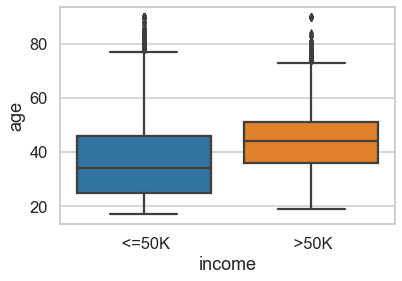

In [42]:
sns.boxplot(x='income', y='age', data=income_df)

In [40]:
## Let's find out if there are discrepancies between race ages.
income_df.groupby(['income'])['race','sex'].describe()

race                          sex                     
        count unique     top   freq  count unique    top   freq
income                                                         
 <=50K  24720      5   White  20699  24720      2   Male  15128
 >50K    7841      5   White   7117   7841      2   Male   6662

What we can see in comparing race and sex is that White-males seem to make up most of this population, which may suggest quite an imbalance of representation in the workforce as it compares to the population.For future studies, we would want to make sure we get a more representative sample across genders, races, and industries to ensure our model is predicting off the correct factors.

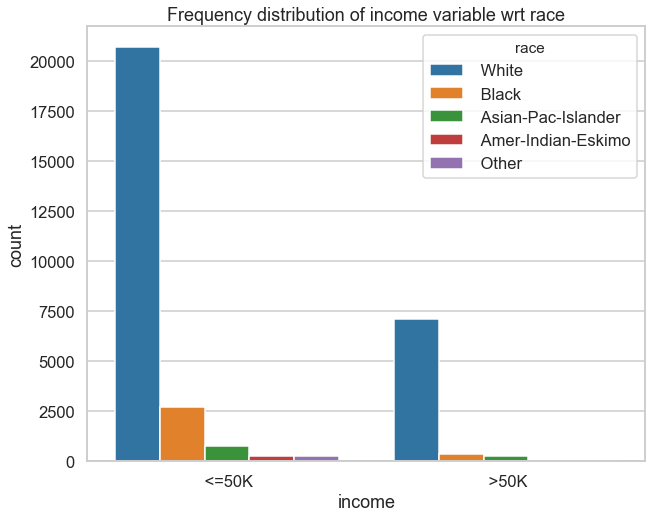

In [69]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=income_copy_df)
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

Other trends include a higher average hours per week worked by those who make over 50K and a higher education number.

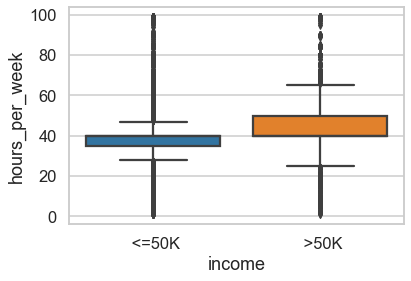

In [45]:
sns.boxplot(x='income', y='hours_per_week', data=income_df)

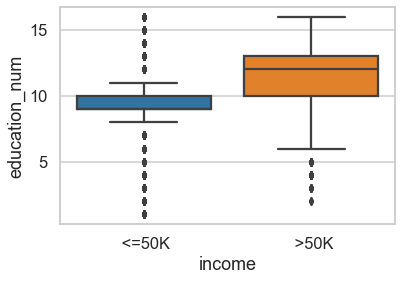

In [46]:
sns.boxplot(x='income', y='education_num', data=income_df)

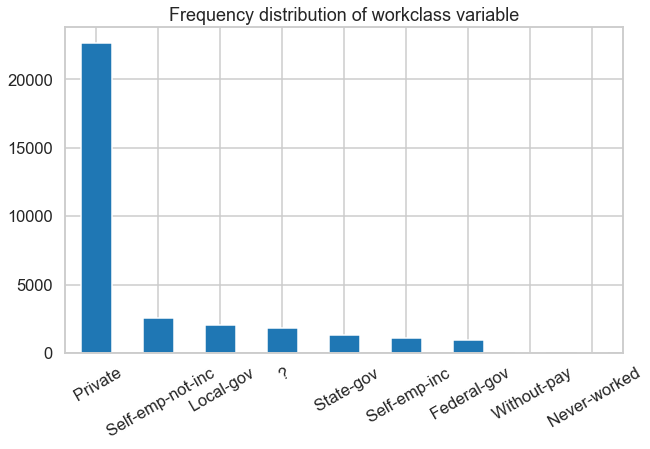

In [70]:
f, ax = plt.subplots(figsize=(10, 6))
ax = income_copy_df.workclass.value_counts().plot(kind="bar")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(income_copy_df.workclass.value_counts().index, rotation=30)
plt.show()

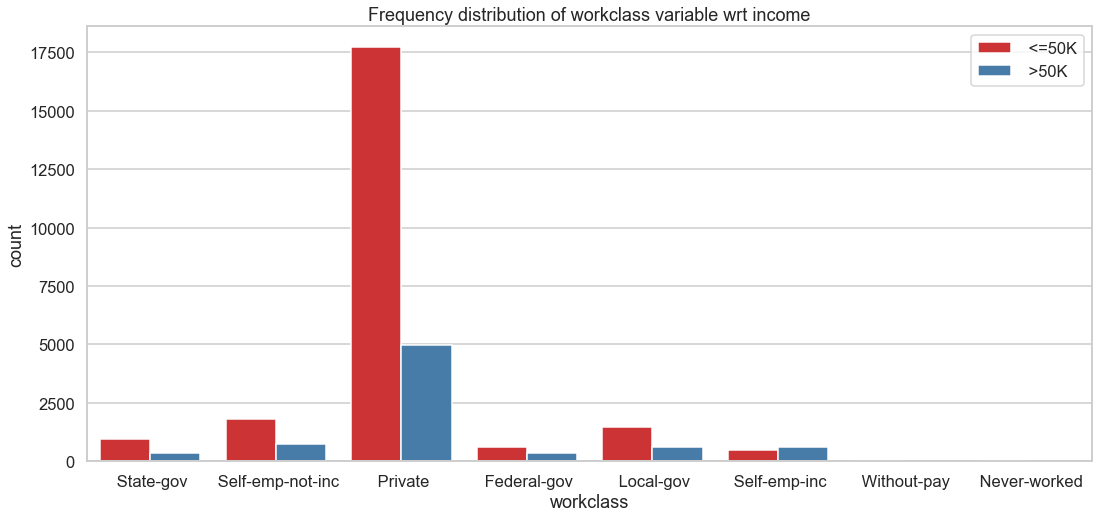

In [81]:
f, ax = plt.subplots(figsize=(18, 8))
ax = sns.countplot(x="workclass", hue="income", data=income_copy_df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

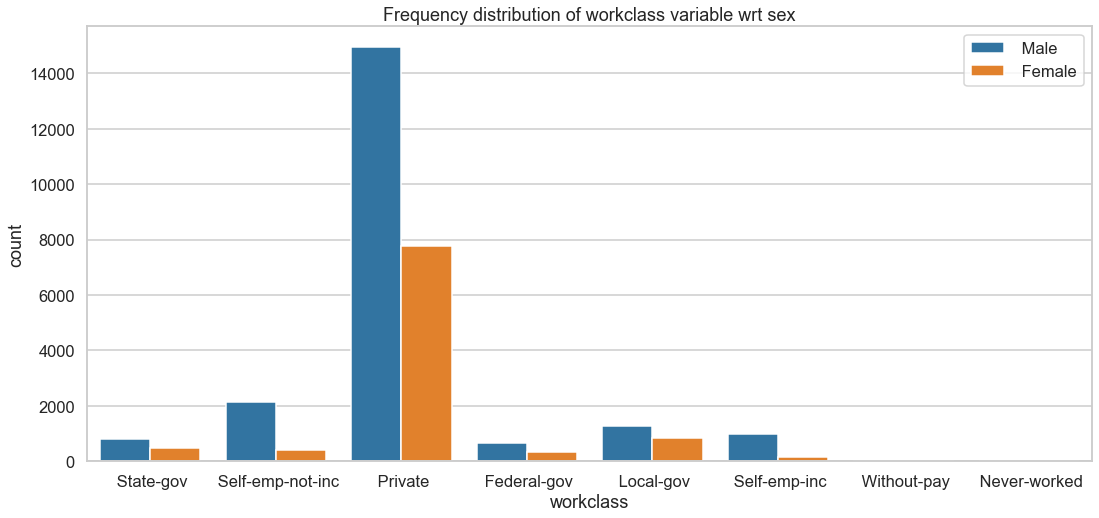

In [80]:
f, ax = plt.subplots(figsize=(18, 8))
ax = sns.countplot(x="workclass", hue="sex", data=income_copy_df)
ax.set_title("Frequency distribution of workclass variable wrt sex")
ax.legend(loc='upper right')
plt.show()

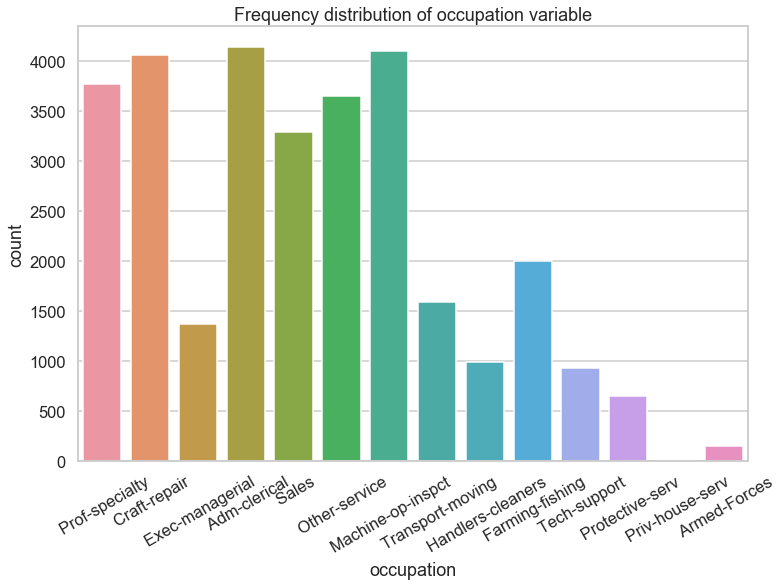

In [77]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=income_copy_df)
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(income_copy_df.occupation.value_counts().index, rotation=30)
plt.show()

Before we proceed, let's continue pre-processing our data:
 

4.Check for collinearity.
5.Scalling (also check for data distribution).
6.check for class imbalancement.
7.spliting data to train/test